<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Roots/Roots_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roots of Equations

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fixed_point, bisect, newton, root_scalar, fsolve

## 1.
The velocity $v$ of a Saturn V rocket in vertical flight near the surface of the Earth can be approximated by:
$$v = u \ln \left( \frac{M_0}{M_0 - \dot{m}t} \right) - gt$$
where:
- $ u = 2510 \, \text{m/s} $ = velocity of exhaust relative to the rocket
- $ M_0 = 2.8 \times 10^6 \, \text{kg} $ = mass of the rocket at liftoff
- $ \dot{m} = 13.3 \times 10^3 \, \text{kg/s} $ = rate of fuel consumption
- $ g = 9.81 \, \text{m/s}^2 $ = gravitational acceleration
- $t$ = time measured from liftoff

Determine the time at which the rocket reaches the speed of sound ($335 \, \text{m/s}$)

In [33]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Find a root of a function using the bisection method.
    
    Parameters:
    f : function
        The function for which to find the root. Must be continuous on [a, b].
    a : float
        Left endpoint of the initial interval
    b : float
        Right endpoint of the initial interval
    tol : float, optional
        Tolerance for convergence (default: 1e-6). The algorithm stops when |f(c)| < tol.
    max_iter : int, optional
        Maximum number of iterations (default: 100)
    
    Returns:
    root : float
        The approximate root of the function
    iterations : int
        The number of iterations performed
    """
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not change sign in the interval [a, b].")
    
    for i in range(max_iter):
        c = (a + b) / 2
        
        if abs(f(c)) < tol:
            return c, i + 1
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
            
    raise RuntimeError(f'Root not found after {max_iter} iterations')

In [34]:
# Problem parameters
u = 2510          # m/s
M0 = 2.8e6        # kg
m_dot = 13.3e3    # kg/s
g = 9.81          # m/s²
v_sound = 335     # m/s

# Function v(t)
def v(t):
    return u * np.log(M0 / (M0 - m_dot * t)) - g * t

# Function f(t) = v(t) - v_sound = 0
def f(t):
    return v(t) - v_sound


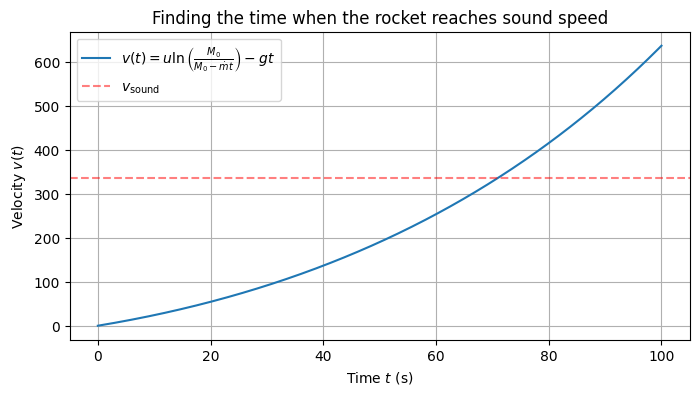

In [35]:
# Time range
t_values = np.linspace(0, 100, 500)
v_values = v(t_values)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t_values, v_values, label=r'$v(t) = u \ln\left(\frac{M_0}{M_0 - \dot{m}t}\right) - gt $')
plt.axhline(v_sound, color='red', linestyle='--', alpha=0.5, label=r'$v_{\text{sound}}$')
plt.xlabel('Time $t$ (s)')
plt.ylabel('Velocity $v(t)$')
plt.title('Finding the time when the rocket reaches sound speed')
plt.grid()
plt.legend()
plt.show()

In [36]:
t_bisection = bisection_method(f, 60, 80)[0]
print(f"Solution with bisection: t ≈ {t_bisection:.6f} s")

Solution with bisection: t ≈ 70.877972 s


## 2.

A particle starts from rest on a smooth inclined plane whose angle $\theta$ changes at a constant rate:
$$\frac{d\theta}{dt} = \omega < 0.$$

<center>

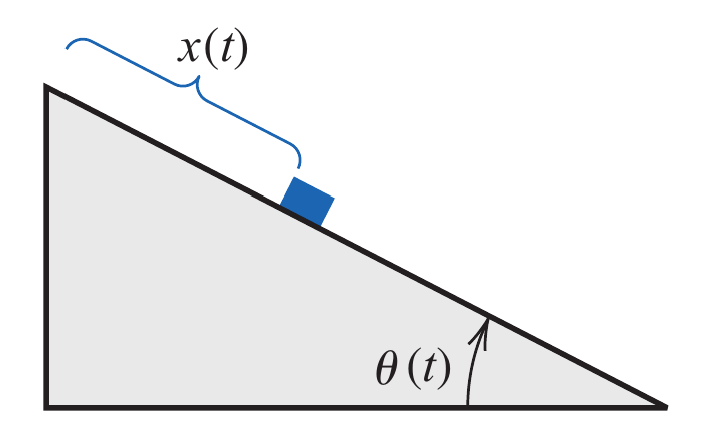

</center>

After $t$ seconds, the position of the object is given by:

$$x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t} - e^{-\omega t}}{2} - \sin \omega t \right).$$

Suppose the particle has moved $1.7 \, \text{ft}$ in $1$ second. Find, to an accuracy of $ 10^{-5}$, the rate $ \omega $ at which $\theta$ changes. Assume $g = 32.17 \, \text{ft/s}^2 $.

In [37]:
def f(omega):
    g = 32.17
    return (g / (2 * omega**2))* ((np.exp(omega)-np.exp(-omega))/2 - np.sin(omega)) + 1.7

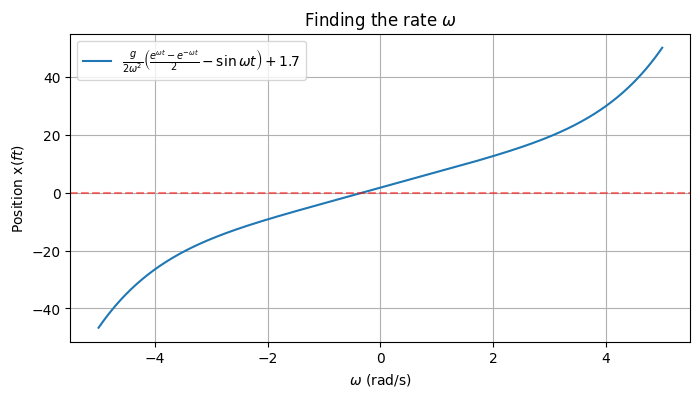

In [38]:
omega_values = np.linspace(-5, 5, 500)
f_values = f(omega_values)

plt.figure(figsize=(8, 4))
plt.plot(omega_values, f_values, label=r'$\frac{g}{2\omega^2} \left( \frac{e^{\omega t} - e^{-\omega t}}{2} - \sin \omega t \right) +1.7$')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.xlabel(r'$\omega$ (rad/s)')
plt.ylabel('Position x($ft$)')
plt.title(r'Finding the rate $\omega$')
plt.grid()
plt.legend()
plt.show()

In [39]:
omega_solution = bisection_method(f, -2, 0.1, tol=1e-5)[0]
print(f"The solution is {omega_solution:.6f} rad/s")

The solution is -0.317062 rad/s


## 3.

The Gibbs free energy for 1 mole of hydrogen at a temperature $T$ is given by:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

where:
- $ R = 8.314 \, \text{J/K} $ is the gas constant.  
- $ T_0 = 4.444 \, \text{J/K} $ is a reference constant. 

Determine the temperature $ T $ at which $ G = -10^5 \, \text{J}$ using bisection and the fixed-point method.

In [40]:
# Constants
R = 8.314  # J/K
T0 = 4.444  # J/K
G_target = -1e5  # J

In [41]:
# We define the function G(T) 
def G(T):
    return -R * T * np.log((T / T0)**(5/2))

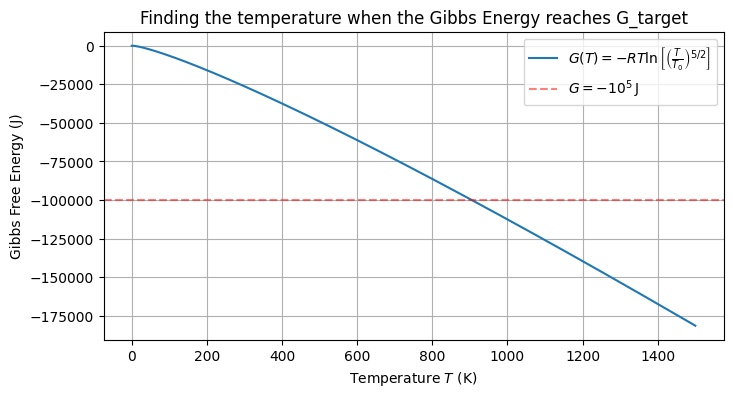

In [42]:
T_vals=np.linspace(0.1,1500,1000)
G_vals=G(T_vals)
plt.figure(figsize=(8, 4))
plt.plot(T_vals, G_vals, label=r'$G(T) = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$')
plt.axhline(G_target, color='red', linestyle='--', alpha=0.5,label=r'$ G = -10^5 \, \text{J}$')
plt.xlabel('Temperature $T$ (K)')
plt.ylabel('Gibbs Free Energy (J)')
plt.title('Finding the temperature when the Gibbs Energy reaches G_target')
plt.grid()
plt.legend()
plt.show()

In [43]:
# We define the function f(T) = G(T) - G_target = 0 for the bisection method
def f(T):
    return G(T) - G_target

# Solve
T_solution_bisect,_ = bisection_method(f,800,1000)
print(f"The temperature T is: {T_solution_bisect:.2f} K")

The temperature T is: 904.97 K


In [44]:
# Fixed-Point Method
def fixed_point_method(g, x0, tol=1e-6, max_iter=200):
    """
    Find fixed point of function g using Fixed-Point method
    
    Parameters:
    g: function such that x = g(x)
    x0: initial guess
    tol: tolerance for convergence
    max_iter: maximum number of iterations
    
    Returns:
    x_new: estimated fixed point
    """
    x = x0
    for i in range(max_iter):
        x_new = g(x)
        error = abs(x_new - x)
        if error < tol:
            return x_new
        x = x_new
    return x

In our problem, there are two different ways to get $T=g(T)$ from $f(T)=0$.
$$G_{target} = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$
$$ f(T)=G_{target}+RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]=0$$

### First way:
$$T = T_0 e^{\frac{-2G_{target}}{5RT}}=g_1(T)$$

In [ ]:
# We define option 1 for function g(T)
def g_1(T):
    return T0 * np.exp(-2*G_target /(5* R * T))

# Resolver
T_solution_fixed_point = fixed_point_method(g_1,900)
print(f"The temperature T is: {T_solution_fixed_point:.2f} K")

The temperature T is: 4.44 K


/tmp/ipykernel_4916/3399770936.py:3: RuntimeWarning: overflow encountered in exp
  return T0 * np.exp(-2*G_target /(5* R * T))


This happens because $|g^\prime (T)|>1$ near the root, violating the convergence condition.

$$
g_1(T) = T_0 e^{-\frac{2G_{target}}{5RT}}
$$

$$
g_1'(T) = T_0 \exp \left(-\frac{2G_{target}}{5RT} \right) \cdot \left(\frac{2G_{target}}{5RT^2} \right)
$$

At the fixed point $T^*$, $T_0 \exp \left(-\frac{2G_{target}}{5RT^*} \right) = T^*$, so:
$$
g_1'(T^*) = T_0 \exp \left(-\frac{2G_{target}}{5RT^*} \right) \cdot \left(\frac{2G_{target}}{5R{T^{*}}^{2}} \right)= T^* \cdot \left(\frac{2G_{target}}{5R{T^{*}}^{2}} \right) = \frac{2G_{target}}{5RT^{*}}
$$

From $T^* \ln\left( \frac{T^*}{T_0} \right) =-\frac{2G_{target}}{5R}$, $\frac{2G_{target}}{5RT^{*}} = -\ln\left( \frac{T^*}{T_0} \right) $, hence:

$$
|g_1'(T^*)| = |-\ln\left( \frac{T^*}{T_0} \right)| = \ln\left( \frac{T^*}{T_0} \right)
$$

Since $ \frac{T^*}{T_0} \gg 1 $, $ |g_1'(T^*)| > 1 $ $\Rightarrow$ diverges.

### Second way:
$$T = \frac{G_{target}}{R \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]}=g_2(T)$$

In [ ]:
# We define option 2 for function g(T)
def g_2(T):
    return -G_target/(R * np.log((T / T0)**(5/2)))

# Resolver
T_solution_fixed_point = fixed_point_method(g_2,900)
print(f"The temperature T is: {T_solution_fixed_point:.2f} K")

The temperature T is: 904.97 K


This happens because $|g^\prime (T)|<1$ near the root, satisfying the convergence condition.

$$
g_2(T) = \frac{G_{target}}{R \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]}= \frac{2G_{target}}{5 R \ln \left[ \left( \frac{T}{T_0} \right) \right]}
$$

$$
g_2'(T) =- \frac{2 G_{target}}{\left[5R \ln  \left( \frac{T}{T_0} \right) \right]^2} \cdot \frac{5R}{T}=- \frac{2 G_{target}}{5R \left[ \ln  \left( \frac{T}{T_0} \right) \right]^2} \cdot \frac{1}{T}
$$

At the fixed point $T^*$, $\frac{2G_{target}}{5 R} = T^* \ln\left( \frac{T^*}{T_0} \right)$, so:
$$
g_2'(T^*) = - \frac{T^* \ln\left( \frac{T^*}{T_0} \right)}{\left[ \ln\left( \frac{T^*}{T_0} \right) \right]^2 \, T^*} = - \frac{1}{\ln\left( \frac{T^*}{T_0} \right)}
$$
Thus:
$$
|g_2'(T^*)| = \frac{1}{\ln\left( \frac{T^*}{T_0} \right)}
$$
Since $\ln\left( \frac{T^*}{T_0} \right) > 1 $, $|g_2'(T^*)| < 1 $ $\Rightarrow$ converges.

## 4. Regula Falsi Method

The Regula Falsi method is a modification of the Bisection method. Based on the following steps, write a function that calculates the root of a function with this method.

### Steps


1. **Initialization:**
    Start with an interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs.

    This guarantees that there is at least one root in the interval (by the Intermediate Value Theorem).

2. **Calculation of the intersection point:**
    Instead of taking the midpoint as in the bisection method, calculate a point $c$ using the following formula:
    $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$
    This formula represents the intersection of the line connecting the points $(a, f(a))$ and $(b, f(b))$ with the x-axis.

3. **Evaluation and interval update:**

Evaluate $f(c)$.

- If $f(c) = 0$ (or is less than an established tolerance), then $c$ is the root.

- If $f(c)$ has the same sign as $f(a)$, update $a = c$.

- If $f(c)$ has the same sign as $f(b)$, update $b = c$.

4. **Iteration:**

Repeat steps 2 and 3 until a stopping criterion is met (e.g., $|f(c)| < \text{tolerance}$ or a maximum number of iterations is reached).

In [47]:
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    """
    Find root of function f using Regula Falsi method
    
    Parameters:
    f: function to find root of 
    a, b: interval endpoints [a, b]
    tol: tolerance for convergence
    max_iter: maximum number of iterations
    
    Returns:
    root: estimated root
    """
    
    # Check if initial interval is valid
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    for i in range(max_iter):
        # Calculate the intersection point
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        fc = f(c)
        
        # Check for convergence
        if abs(fc) < tol:
            return c
        
        # Update interval
        if f(a) * fc < 0:
            b = c
        else:
            a = c
    print(f"Maximum iterations reached ({max_iter})")
    return c

In [48]:
# Test function: f(x) = x^2 - 4
test_function = lambda x: x**2 - 4

# Test for positive root (x = 2)
print("Finding positive root (x = 2):")
a, b = 1, 3  # Interval containing root x = 2
root1= regula_falsi(test_function, a, b, tol=1e-6)
print(f"Found root: {root1:.8f}")
print(f"True root: 2.00000000")
print(f"Absolute error: {abs(root1 - 2):.2e}\n")

# Test for negative root (x = -2)
print("Finding negative root (x = -2):")
a, b = -3, -1  # Interval containing root x = -2
root2= regula_falsi(test_function, a, b, tol=1e-6)
print(f"Found root: {root2:.8f}")
print(f"True root: -2.00000000")
print(f"Absolute error: {abs(root2 - (-2)):.2e}\n")

Finding positive root (x = 2):
Found root: 1.99999986
True root: 2.00000000
Absolute error: 1.37e-07

Finding negative root (x = -2):
Found root: -1.99999986
True root: -2.00000000
Absolute error: 1.37e-07



## 5
A vertically falling object moving through the air is subject to viscous resistance in addition to the force of gravity. Suppose an object with mass $m$ is dropped from a height $s_0$​ and that its height after $t$ seconds is given by:

$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2 g}{k^2}(1 - e^{-kt/m}),$$

where $g = 32.17 \, \text{ft/s}^2 $ and $ k $ represents the air resistance coefficient in $\text{lb-s/ft}$. Assume $s_0 = 300 \, \text{ft} $, $ m = 0.25 \, \text{lb} $, and $ k = 0.1 \, \text{lb-s/ft} $. Find, to a precision of 0.01 s, the time it takes for this quarter-pound object to hit the ground. 

In [49]:
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    """
    Find root of function f using Newton-Raphson method
    
    Parameters:
    f: function to find root of
    df: derivative of function f  
    x0: initial guess
    tol: tolerance for convergence
    max_iter: maximum number of iterations
    
    Returns:
    x: estimated root
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:  # Avoid division by zero
            raise ValueError("Derivative equal to zero")
        
        x_new = x - fx / dfx
        error = abs(x_new - x)
        
        if error < tol:
            return x_new

        x = x_new
    return x

In [50]:
# Parameters
s0 = 300  # ft
m = 0.25  # lb
k = 0.1   # lb-s/ft
g = 32.17 # ft/s^2

# Define the position function s(t)
def s(t):
    return s0 - (m*g/k)*t + (m**2 * g / k**2) * (1 - np.exp(-k*t/m))

# Define the derivative of s(t) (velocity function)
def ds_dt(t):
    return - (m*g/k) + (m*g/k) * np.exp(-k*t/m)


In [51]:
# Make an initial guess - without air resistance it would be t = sqrt(2*s0/g)
t_guess = np.sqrt(2 * s0 / g) 

# Use Newton-Raphson to find the root
t_solution = newton_method(s, ds_dt, t_guess,tol=0.01)

print(f"Time to hit ground: {t_solution:.3f} s")

Time to hit ground: 6.004 s


## 6.
Determine the coordinates of the two points where the circles $(x - 2)^2 + y^2 = 4$ and $x^2 + (y - 3)^2 = 4$ intersect. Begin by estimating the locations of the points from a sketch of the circles, and then use the secant method to compute the coordinates.

In [52]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Find root of function f using Secant method
    
    Parameters:
    f: function to find root of
    x0, x1: two initial guesses
    tol: tolerance for convergence
    max_iter: maximum number of iterations
    
    Returns:
    x: estimated root
    """
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)
        
        if f1 - f0 == 0:  # Avoid division by zero
            raise ValueError("Denominator equal to zero")
        
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        error = abs(x2 - x1)
        
        if error < tol:
            return x2
        
        x0, x1 = x1, x2
    
    return x2

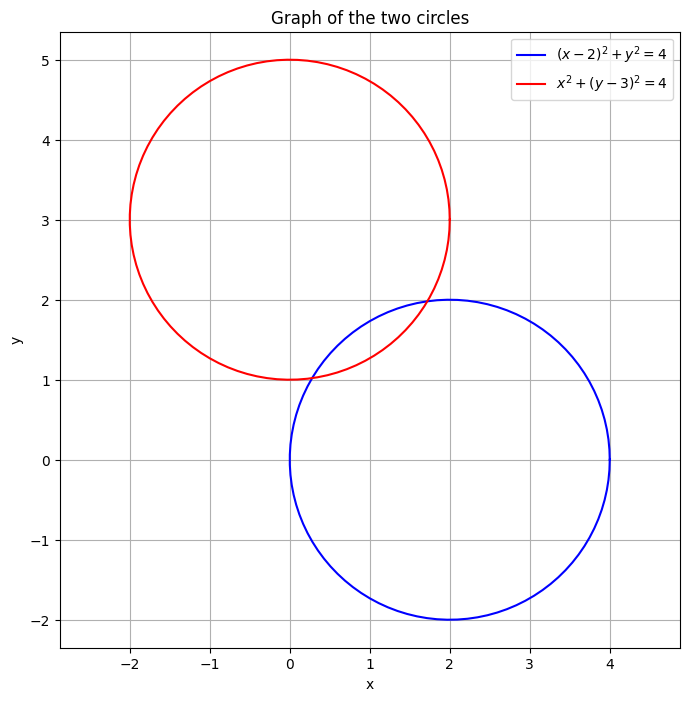

In [53]:
theta = np.linspace(0, 2 * np.pi, 100)

# Circle 1: (x - 2)² + y² = 4 → Center (2, 0), Radius 2
x_c1 = 2 + 2 * np.cos(theta)
y_c1 = 0 + 2 * np.sin(theta)

# Circle 2: x² + (y - 3)² = 4 → Center (0, 3), Radius 2
x_c2 = 0 + 2 * np.cos(theta)
y_c2 = 3 + 2 * np.sin(theta)

# Graficamos las circunferencias
plt.figure(figsize=(8, 8))
plt.plot(x_c1, y_c1, 'b-', label='$(x - 2)^2 + y^2 = 4$')
plt.plot(x_c2, y_c2, 'r-', label='$x^2 + (y - 3)^2 = 4$')


plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of the two circles')
plt.axis('equal')
plt.legend()
plt.show()

First, we set both equations equal to each other:
$$
(x-2)^2+y^2=x^2+(y-3)^2
$$
$$
6y-4x=5
$$
$$
y=\frac{4x+5}{6}.
$$
We substitute this expression into either of the circle equations:
$$
(x-2)^2+\left(\frac{4x+5}{6}\right)^2=4
$$

In [54]:
def f(x):
    """Function whose roots give x-coordinates of intersection points"""
    return (x - 2)**2 + ((4*x + 5)/6)**2 - 4


# Solutions for x and y
x1 = secant_method(f, 0.1, 0.2)
x2 = secant_method(f, 1.5, 2.0)

y1 = (4*x1 + 5) / 6
y2 = (4*x2 + 5) / 6

print(f"Point 1: ({x1:.6f}, {y1:.6f})")
print(f"Point 2: ({x2:.6f}, {y2:.6f})")



Point 1: (0.279423, 1.019616)
Point 2: (1.720577, 1.980384)


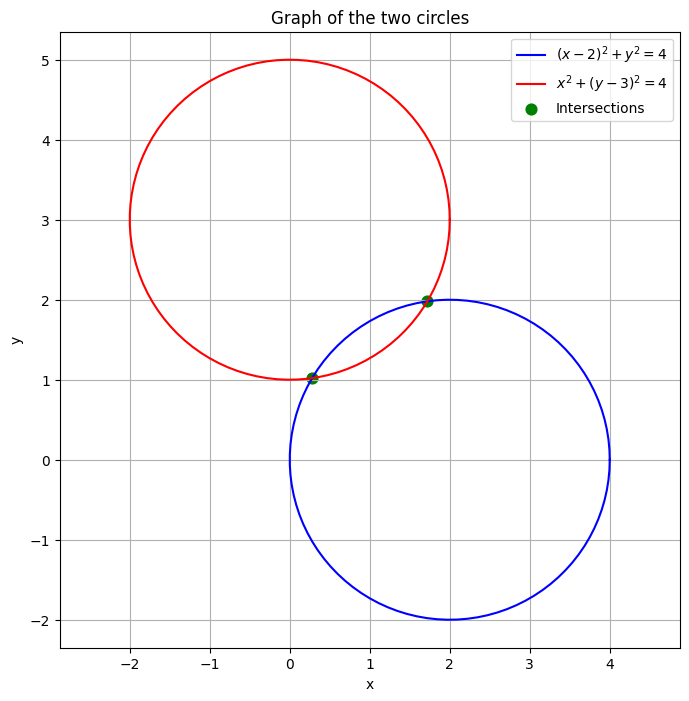

In [55]:
# Plot with intersection points marked
plt.figure(figsize=(8, 8))
plt.plot(x_c1, y_c1, 'b-', label='$(x - 2)^2 + y^2 = 4$')
plt.plot(x_c2, y_c2, 'r-', label='$x^2 + (y - 3)^2 = 4$')
plt.scatter(x1,y1,color='green',s=60, label='Intersections')
plt.scatter(x2,y2,color='green', s=60)


plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of the two circles')
plt.axis('equal')
plt.legend()
plt.show()

## 7
For what angle is the area of the circular segment equal to a quarter of the area of the circle?

- Show that the expression that allows solving this problem is:


$$
\theta - \sin \theta = \frac{\pi}{2}
$$


- Construct a graph for $\theta$. Around which value is the solution located?

- Use the bisection method, fixed-point method, Newton's method, and the secant method to verify the solution guessed in the previous part (For this part, it is recommended to use a `dataframe`).

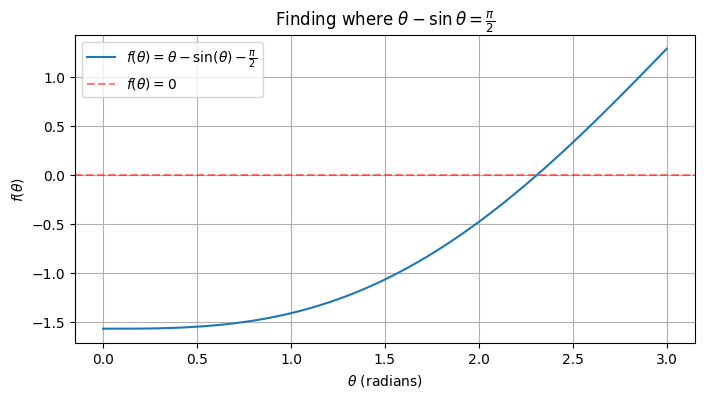

In [56]:
# Define the function f
def f(theta):
    return theta - np.sin(theta) - np.pi/2

# Theta range for the plot
theta = np.linspace(0, 3, 500)
y = f(theta)

# Graph to estimate the solution
plt.figure(figsize=(8, 4))
plt.plot(theta, y, label=r'$f(\theta) = \theta - \sin(\theta) - \frac{\pi}{2}$')
plt.axhline(0, color='red', linestyle='--', alpha=0.5, label=r'$f(\theta) =0$')
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$f(\theta)$')
plt.title(r'Finding where $\theta - \sin \theta = \frac{\pi}{2}$')
plt.grid(True)
plt.legend()
plt.show()

In [57]:
# Apply bisection in [2, 2.5]
theta_bisection= bisection_method(f, 2, 2.5)[0]
print(f"Solution with bisection: θ ≈ {theta_bisection:.6f} radians")

Solution with bisection: θ ≈ 2.309881 radians


In [58]:
# Define the function g for fixed point method
def g(theta):
    return np.sin(theta) + np.pi/2

# Fixed-Point with an initial angle = 2.3
theta_fixed_point = fixed_point_method(g, 2.3)
print(f"Solution with fixed point: θ ≈ {theta_fixed_point:.6f} radians")

Solution with fixed point: θ ≈ 2.309881 radians


In [59]:
# Derivative for Newton Raphson method
def df(theta):
    return 1 - np.cos(theta)


# Newton with an initial angle = 2.3
theta_newton = newton_method(f, df, 2.3)
print(f"Solution with Newton: θ ≈ {theta_newton:.6f} radians")

Solution with Newton: θ ≈ 2.309881 radians


In [60]:
# Secant Method
theta_secante = secant_method(f, 2, 2.5)
print(f"Solution with secant: θ ≈ {theta_secante:.6f} radians")

Solution with secant: θ ≈ 2.309881 radians


In [61]:
results = pd.DataFrame({
    "Method": ["Bisection", "Fixed-Point", "Newton", "Secant"],
    "θ (rad)": [theta_bisection, theta_fixed_point, theta_newton, theta_secante],
    "Relative Error": [
        abs(theta_bisection - theta_newton) / theta_newton,
        abs(theta_fixed_point - theta_newton) / theta_newton,
        0,  # Newton is the reference
        abs(theta_secante - theta_newton) / theta_newton
    ]
})

results

,Method,θ (rad),Relative Error
0,Bisection,2.309881,1.080934e-07
1,Fixed-Point,2.309881,1.473827e-07
2,Newton,2.309881,0.000000e+00
3,Secant,2.309881,0.000000e+00


### Using Scipy

In [62]:
raiz_b = bisect(f,2, 2.5, xtol=1e-6) # Bisection
raiz_n = newton(f, 2.2, fprime=df, tol=1e-6) # Newton-Raphson
raiz_f = fixed_point(g, 2.2, xtol=1e-6) # Fixed Point
raiz_r = root_scalar(f, x0 = 2.2, x1=2.3, method = 'secant') # Secant
raiz_fsolve = fsolve(f,2)[0] # fsolve

print(f'Root with bisection method {raiz_b}')
print(f'Root with Fixed Point method {raiz_f}')
print(f'Root with Newton-Raphson method {raiz_n}')
print(f'Root with Secant method {raiz_r.root}')
print(f'Root with fsolve method {raiz_fsolve}')

Root with bisection method 2.309882164001465
Root with Fixed Point method 2.3098814600100286
Root with Newton-Raphson method 2.309881460010057
Root with Secant method 2.309881460010058
Root with fsolve method 2.309881460010033
